In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

KeyboardInterrupt: 

# Data Analyse

In [2]:
interactions = pd.read_csv("./KuaiRec 2.0/data/big_matrix.csv")

interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [3]:
interactions_test = pd.read_csv("./KuaiRec 2.0/data/small_matrix.csv")
interactions_test.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


In [4]:
# Users in common
common_users = set(interactions['user_id']).intersection(set(interactions_test['user_id']))
print(f"Users in common: {len(common_users)}")

# Users not in common
users_not_in_common = set(interactions['user_id']).symmetric_difference(set(interactions_test['user_id']))
print(f"Users not in common: {len(users_not_in_common)}")

# Videos in common
common_videos = set(interactions['video_id']).intersection(set(interactions_test['video_id']))
print(f"Videos in common: {len(common_videos)}")

# Videos not in common
videos_not_in_common = set(interactions['video_id']).symmetric_difference(set(interactions_test['video_id']))
print(f"Videos not in common: {len(videos_not_in_common)}")

Users in common: 1411
Users not in common: 5765
Videos in common: 3327
Videos not in common: 7401


In [4]:
user_features = pd.read_csv("./KuaiRec 2.0/data/user_features.csv")
user_features.head()

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
interactions_test['user_id'].unique().shape

(1411,)

In [ ]:
user_features['user_id'].isin(~interactions_test['user_id']).an

0       False
1       False
2       False
3       False
4       False
        ...  
7171    False
7172    False
7173    False
7174    False
7175    False
Name: user_id, Length: 7176, dtype: bool

In [10]:
interactions_test[~interactions_test['user_id'].isin(user_features['user_id'])]

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


In [23]:
common_users = set(interactions_test['user_id']).intersection(set(user_features['user_id']))
print(f"Users in common: {len(common_users)}")

# Users not in common
users_not_in_common = set(interactions_test['user_id']).symmetric_difference(set(user_features['user_id']))
print(f"Users not in common: {len(users_not_in_common)}")

Users in common: 1411
Users not in common: 5765


In [6]:
item_daily_features = pd.read_csv("./KuaiRec 2.0/data/item_daily_features.csv")
item_daily_features.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


In [5]:
item_categories = pd.read_csv("./KuaiRec 2.0/data/item_categories.csv")
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


In [71]:
# Exploser les listes dans la colonne 'feat' en lignes individuelles
item_categories['feat'] = item_categories['feat'].apply(eval)  # Convertir les chaînes en listes
exploded_feats = item_categories.explode('feat')

# Compter les occurrences de chaque 'feat'
feat_counts = exploded_feats['feat'].value_counts()

# Afficher la répartition sous forme d'histogramme
feat_counts.plot(kind='bar', figsize=(12, 6), title="Répartition des 'feat'")
plt.xlabel("Feat")
plt.ylabel("Nombre d'occurrences")
plt.grid(axis='y', alpha=0.3)
plt.show()

TypeError: eval() arg 1 must be a string, bytes or code object

In [11]:
# Exploser les listes dans la colonne 'feat' en lignes individuelles
item_categories['feat'] = item_categories['feat'].apply(eval)  # Convertir les chaînes en listes
exploded_feats = item_categories.explode('feat')

# Effectuer un encodage one-hot sur la colonne 'feat'
one_hot_encoded = pd.get_dummies(exploded_feats, columns=['feat'], prefix='feat')

# Agréger les résultats pour chaque 'video_id'
item_categories_one_hot = one_hot_encoded.groupby('video_id').sum().reset_index()

# Afficher le résultat
item_categories_one_hot.head()

,video_id,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
user_features.columns

Index(['user_id', 'user_active_degree', 'is_lowactive_period',
       'is_live_streamer', 'is_video_author', 'follow_user_num',
       'follow_user_num_range', 'fans_user_num', 'fans_user_num_range',
       'friend_user_num', 'friend_user_num_range', 'register_days',
       'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat2',
       'onehot_feat3', 'onehot_feat4', 'onehot_feat5', 'onehot_feat6',
       'onehot_feat7', 'onehot_feat8', 'onehot_feat9', 'onehot_feat10',
       'onehot_feat11', 'onehot_feat12', 'onehot_feat13', 'onehot_feat14',
       'onehot_feat15', 'onehot_feat16', 'onehot_feat17'],
      dtype='object')

In [61]:
item_daily_features.columns

Index(['video_id', 'date', 'author_id', 'video_type', 'upload_dt',
       'upload_type', 'visible_status', 'video_duration', 'video_width',
       'video_height', 'music_id', 'video_tag_id', 'video_tag_name',
       'show_cnt', 'show_user_num', 'play_cnt', 'play_user_num',
       'play_duration', 'complete_play_cnt', 'complete_play_user_num',
       'valid_play_cnt', 'valid_play_user_num', 'long_time_play_cnt',
       'long_time_play_user_num', 'short_time_play_cnt',
       'short_time_play_user_num', 'play_progress', 'comment_stay_duration',
       'like_cnt', 'like_user_num', 'click_like_cnt', 'double_click_cnt',
       'cancel_like_cnt', 'cancel_like_user_num', 'comment_cnt',
       'comment_user_num', 'direct_comment_cnt', 'reply_comment_cnt',
       'delete_comment_cnt', 'delete_comment_user_num', 'comment_like_cnt',
       'comment_like_user_num', 'follow_cnt', 'follow_user_num',
       'cancel_follow_cnt', 'cancel_follow_user_num', 'share_cnt',
       'share_user_num', 'download

## Check missing/error values

In [4]:
print(f"=== Check for nan ===")
for column in interactions.columns:
    if not interactions[interactions[column].isna()].empty:
        print(f"Column: {column}")
        print(interactions[interactions[column].isna()])

=== Check for nan ===


In [65]:
print(f"=== Check for nan ===")
for column in item_categories.columns:
    if not item_categories[item_categories[column].isna()].empty:
        print(f"Column: {column}")
        print(item_categories[item_categories[column].isna()])

=== Check for nan ===


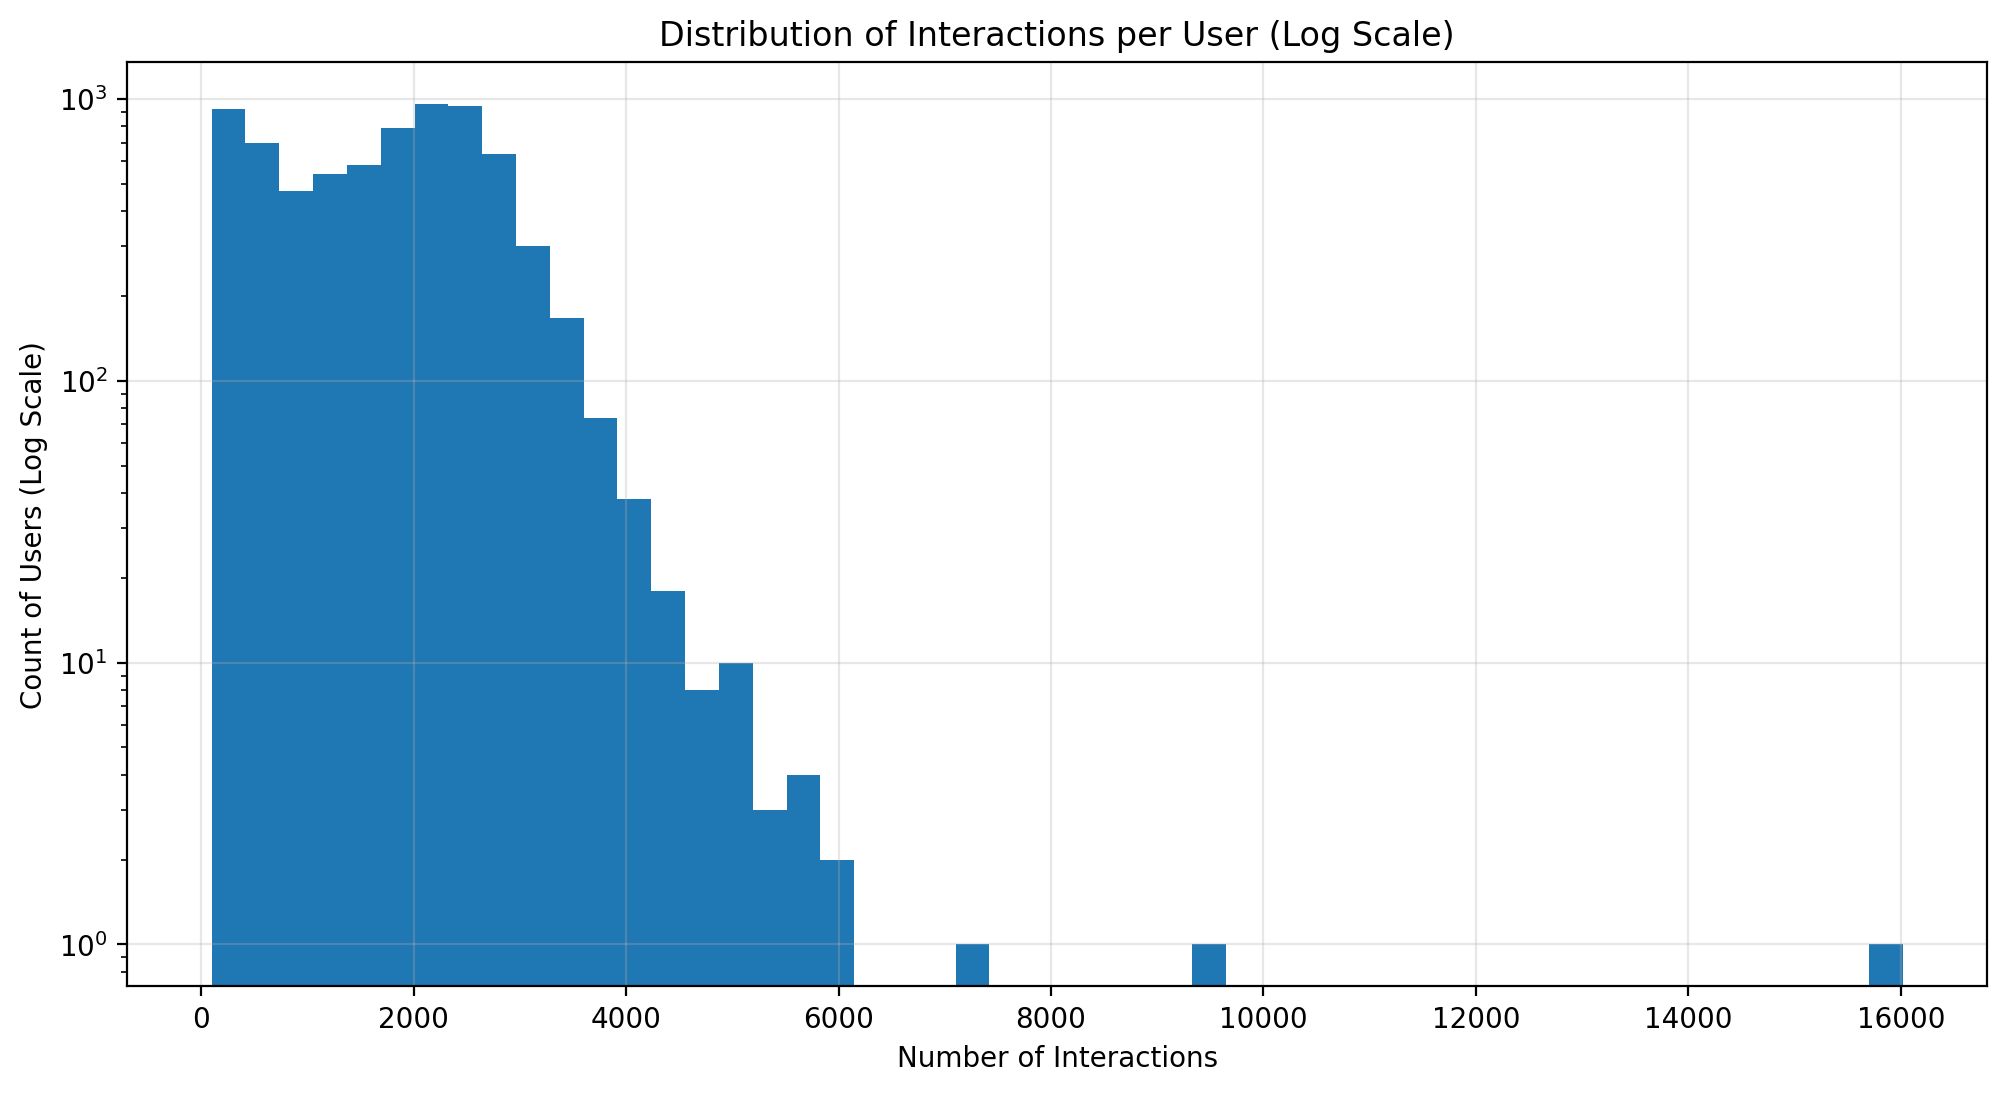

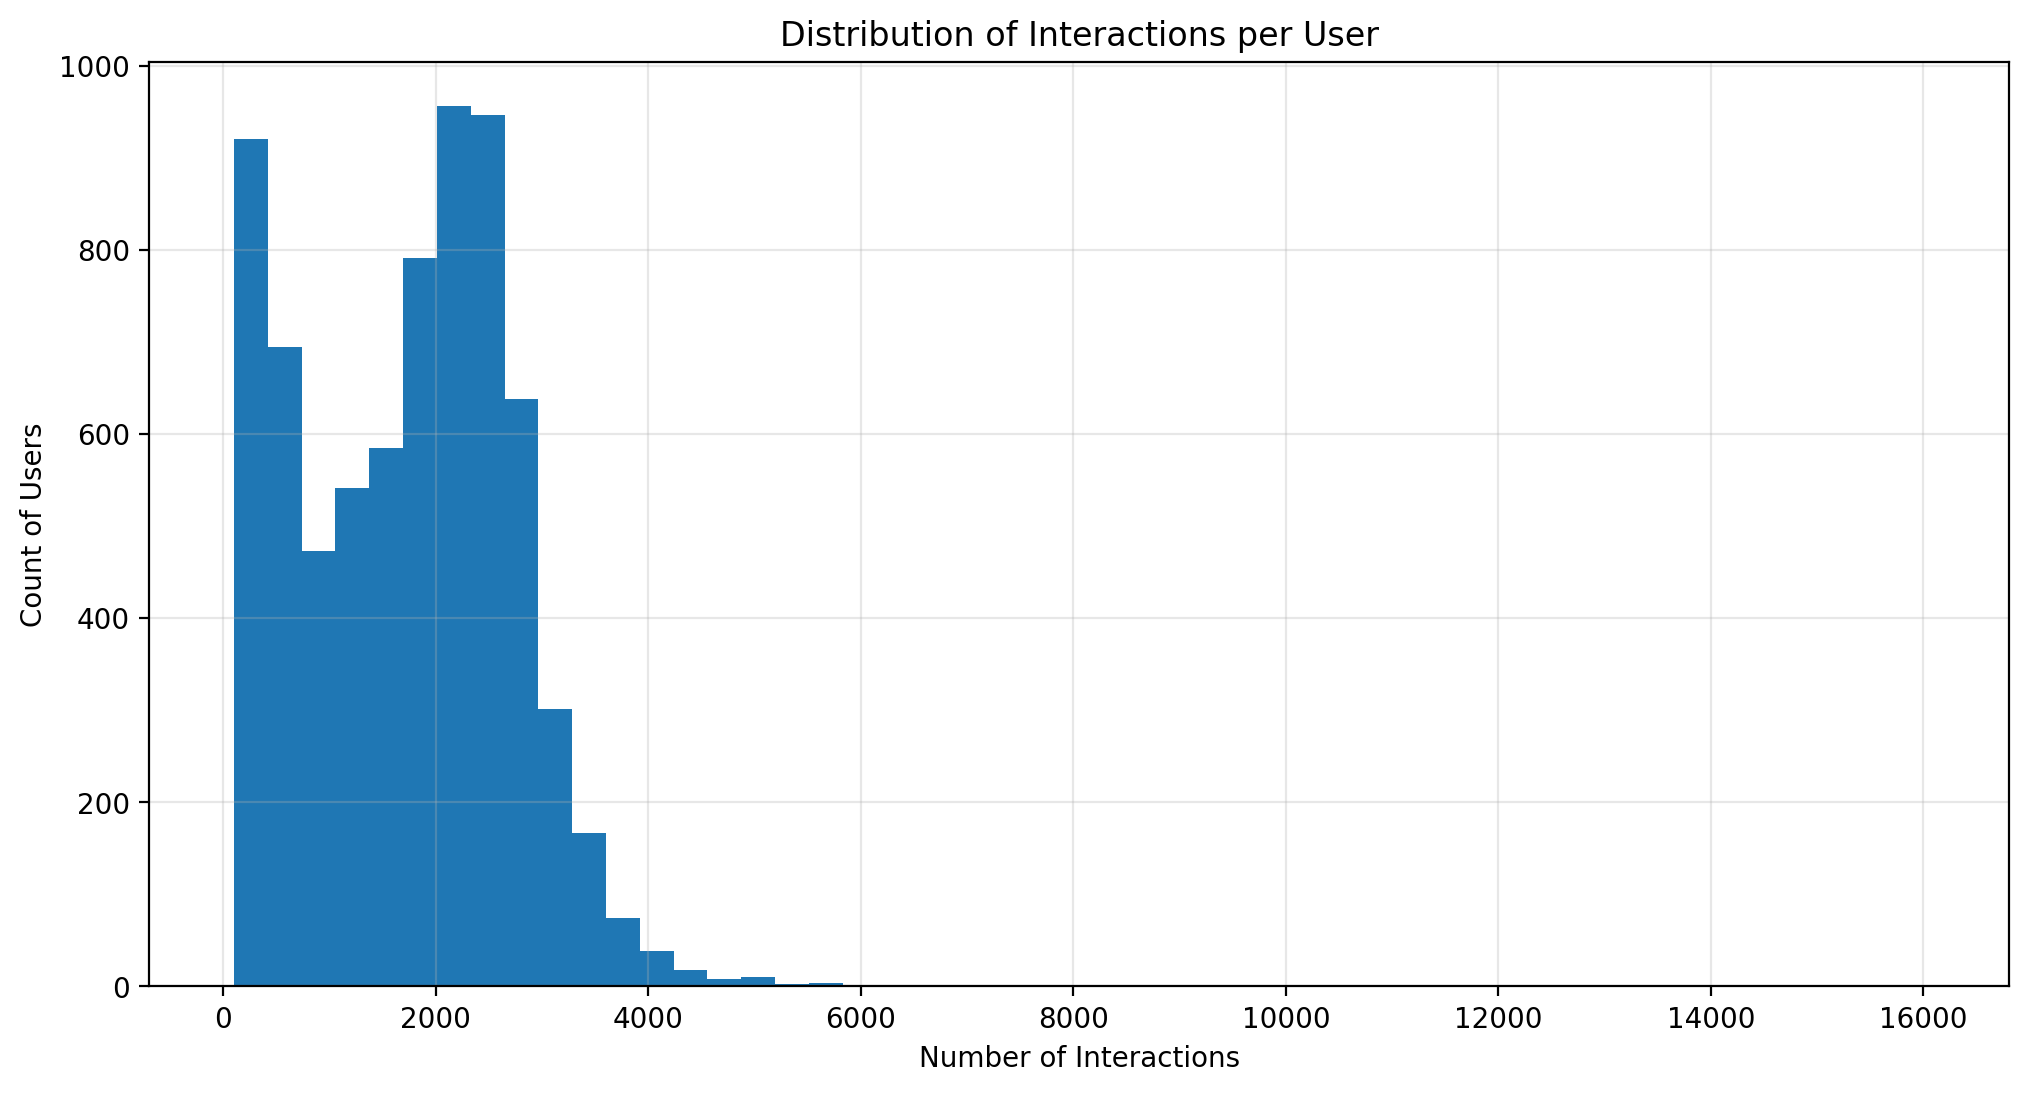

In [5]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

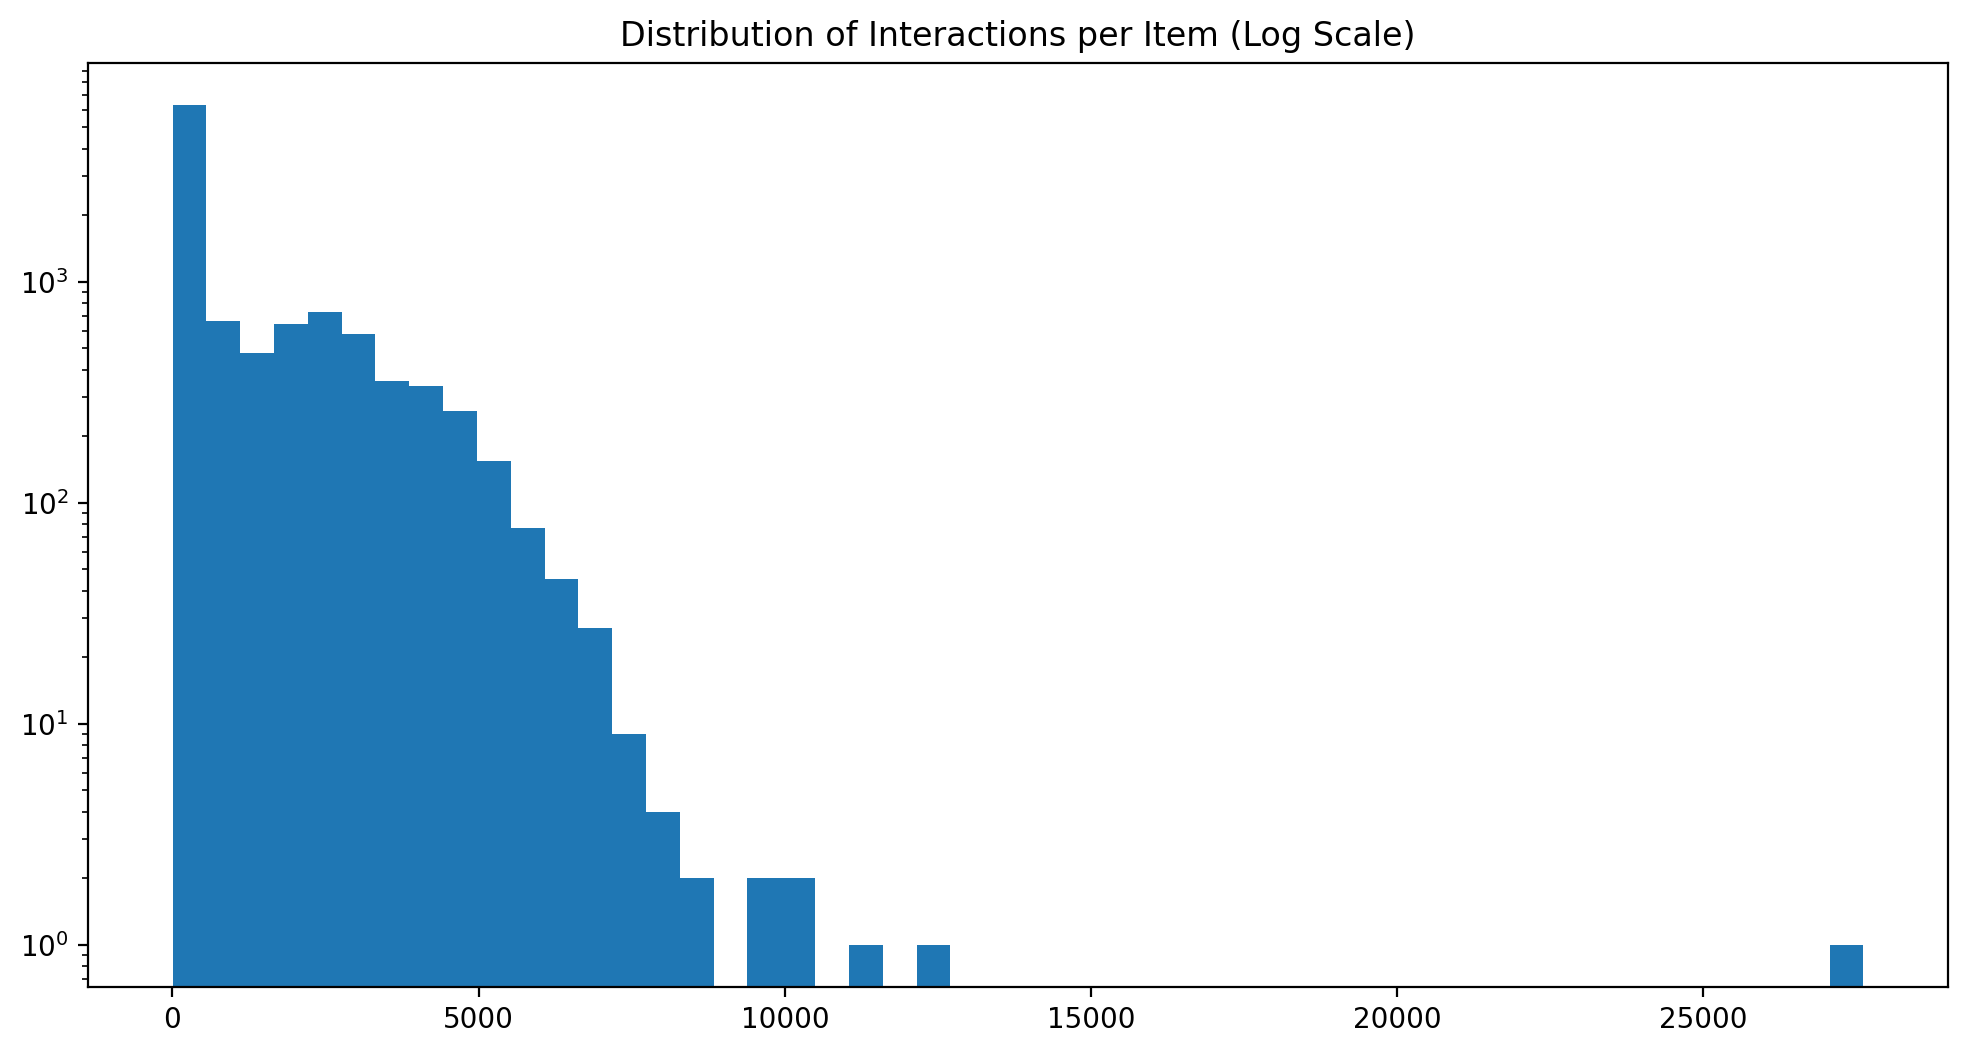

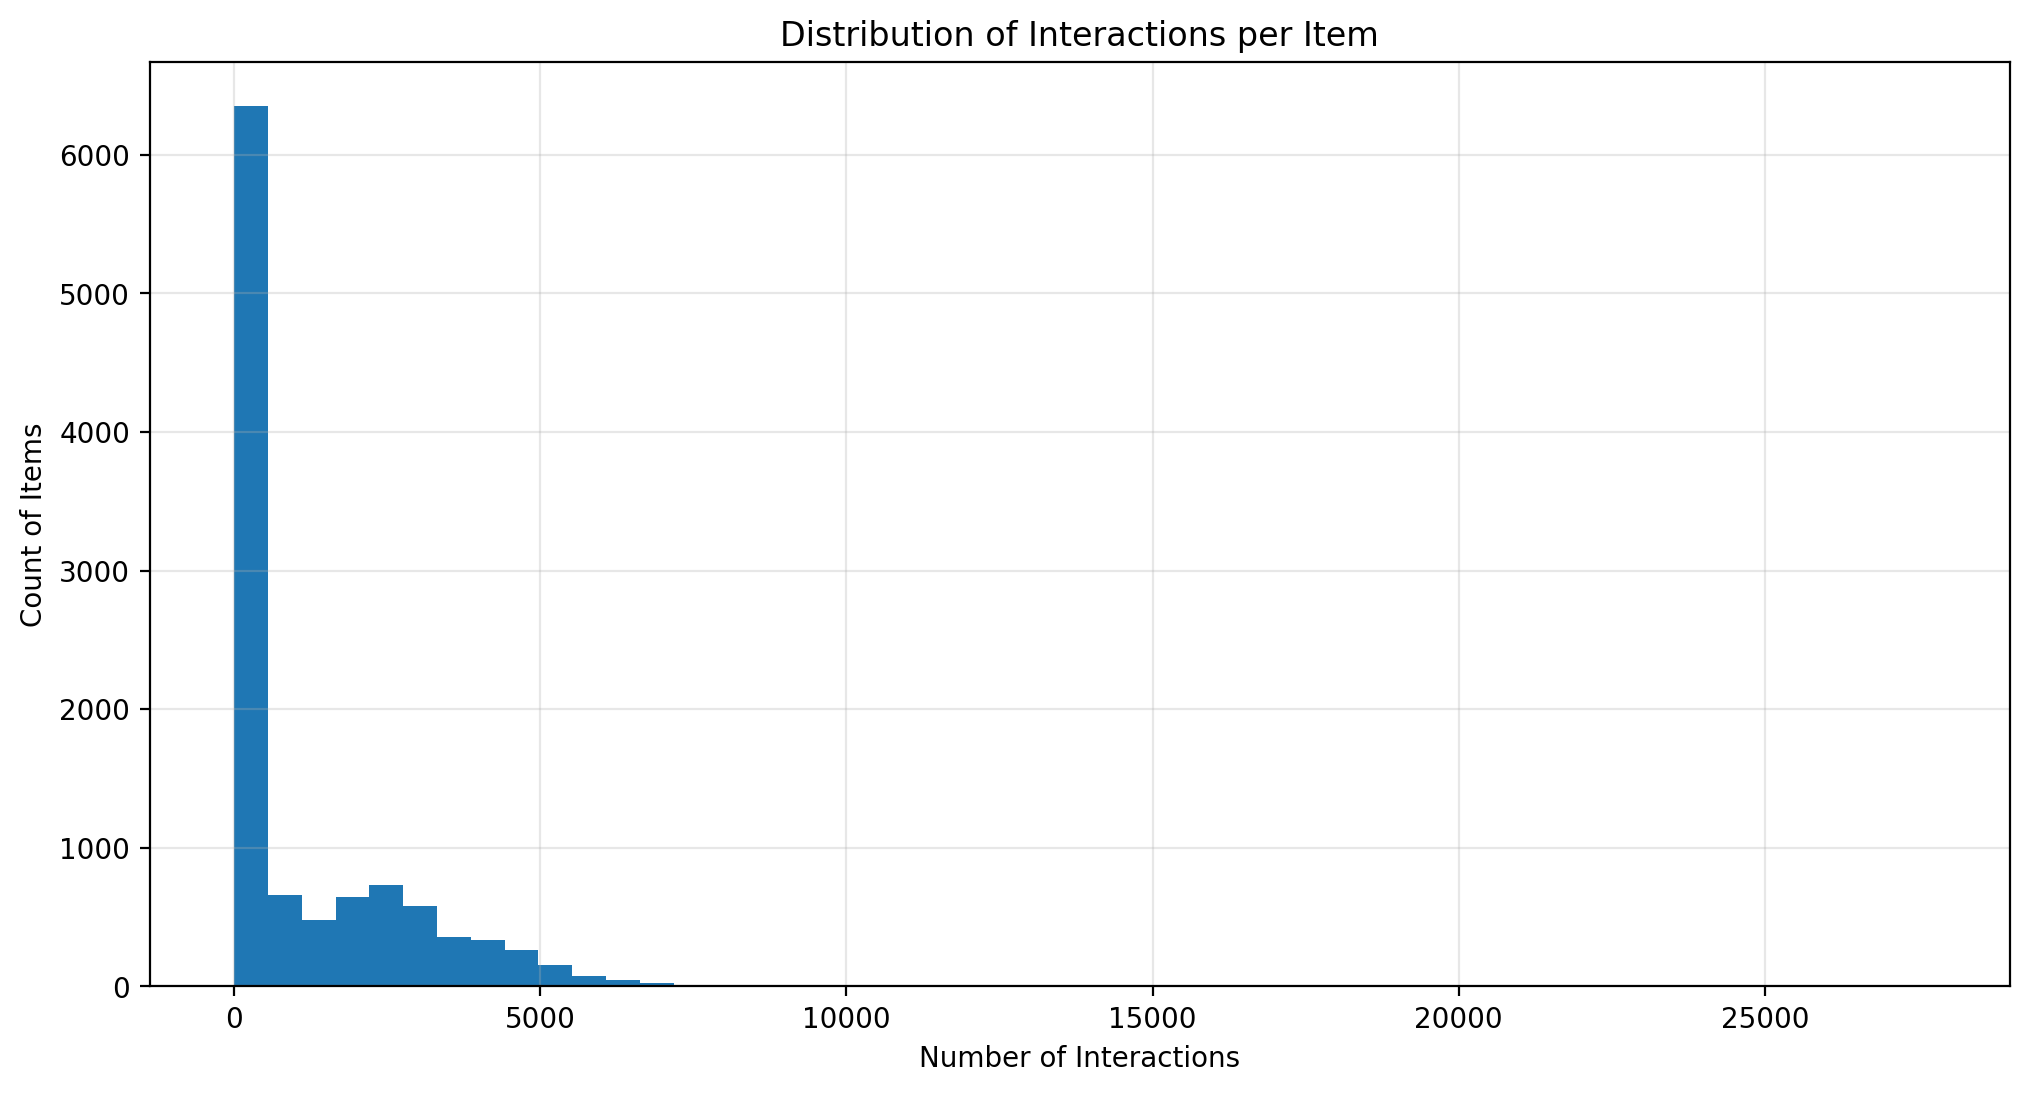

In [6]:
# Let's see the distribution of the interactions per item
item_counts = interactions["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [8]:
interactions[ (interactions['user_id'] == 3586) & (interactions['video_id'] == 7723)]


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
6284550,3586,7723,9799,9705,2020-08-31 06:34:20.211,20200831,1.598827e+09,1.009686
6284551,3586,7723,9799,9705,2020-08-31 06:34:20.211,20200831,1.598827e+09,1.009686
6284552,3586,7723,24074,9705,2020-08-31 06:34:51.544,20200831,1.598827e+09,2.480577
6284553,3586,7723,24074,9705,2020-08-31 06:34:51.544,20200831,1.598827e+09,2.480577
6284554,3586,7723,24167,9705,2020-08-31 06:35:22.929,20200831,1.598827e+09,2.490160
...,...,...,...,...,...,...,...,...
6286769,3586,7723,24057,9705,2020-08-31 16:14:19.494,20200831,1.598862e+09,2.478825
6286770,3586,7723,24029,9705,2020-08-31 16:14:50.934,20200831,1.598862e+09,2.475940
6286771,3586,7723,24029,9705,2020-08-31 16:14:50.934,20200831,1.598862e+09,2.475940
6286772,3586,7723,21667,9705,2020-08-31 16:15:19.767,20200831,1.598862e+09,2.232561


In [9]:
test = interactions.groupby(['user_id','video_id']).agg({'video_id':'count'}).dropna().rename(columns={'video_id':'count'})


In [10]:
test.value_counts()

count
1        8459425
2        1614853
3         167692
4          35806
5           8594
          ...   
1148           1
1180           1
1725           1
1787           1
2224           1
Name: count, Length: 145, dtype: int64

<Axes: xlabel='count'>

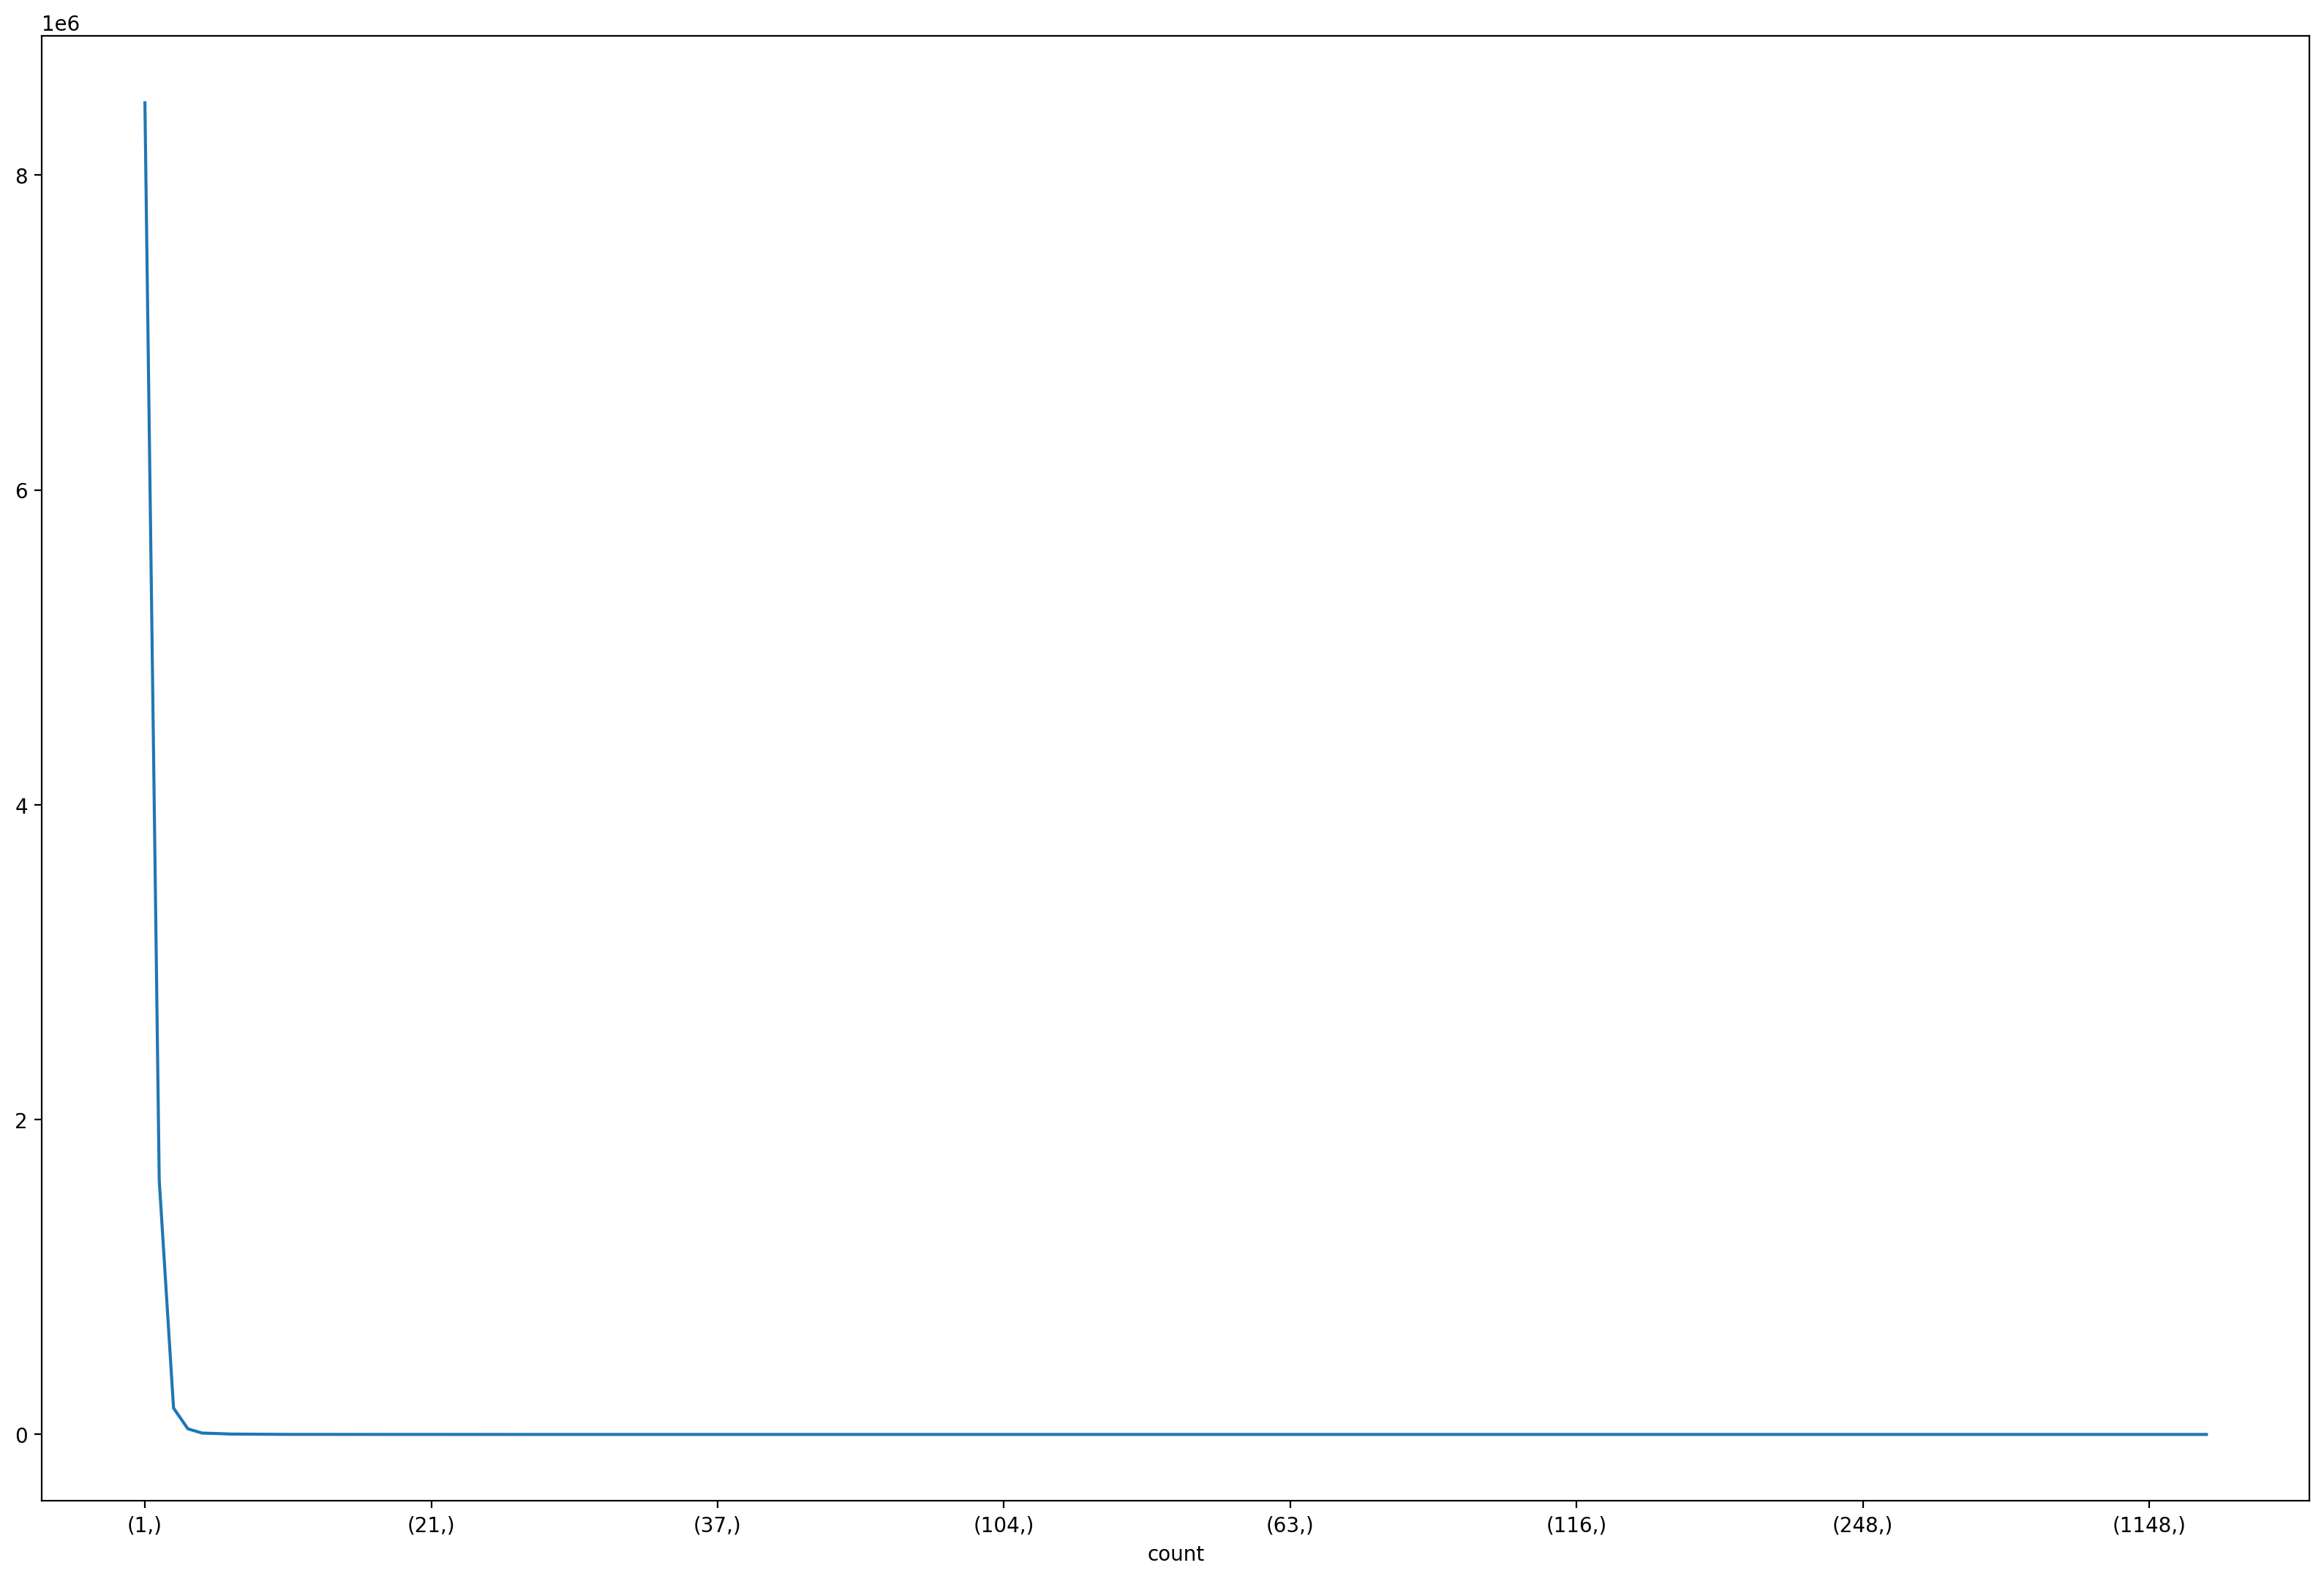

In [11]:
test.value_counts().plot()

In [12]:
np.unique(test['count'])

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   52,   53,   54,   55,   56,
         58,   59,   60,   61,   62,   63,   64,   65,   66,   68,   69,
         70,   71,   72,   76,   77,   78,   80,   81,   82,   85,   86,
         89,   91,   92,   95,   96,   97,   99,  100,  102,  103,  104,
        106,  108,  110,  115,  116,  119,  124,  125,  128,  131,  132,
        134,  136,  137,  138,  140,  141,  142,  144,  153,  163,  166,
        168,  196,  198,  200,  208,  211,  217,  222,  228,  230,  248,
        251,  267,  272,  274,  313,  326,  329,  336,  348,  367,  386,
        415,  436,  481,  503,  567,  648,  767,  962, 1148, 1180, 1725,
       1787, 2224])

In [13]:
test[test['video_id'] > 1]

KeyError: 'video_id'

<Axes: xlabel='user_id,video_id'>

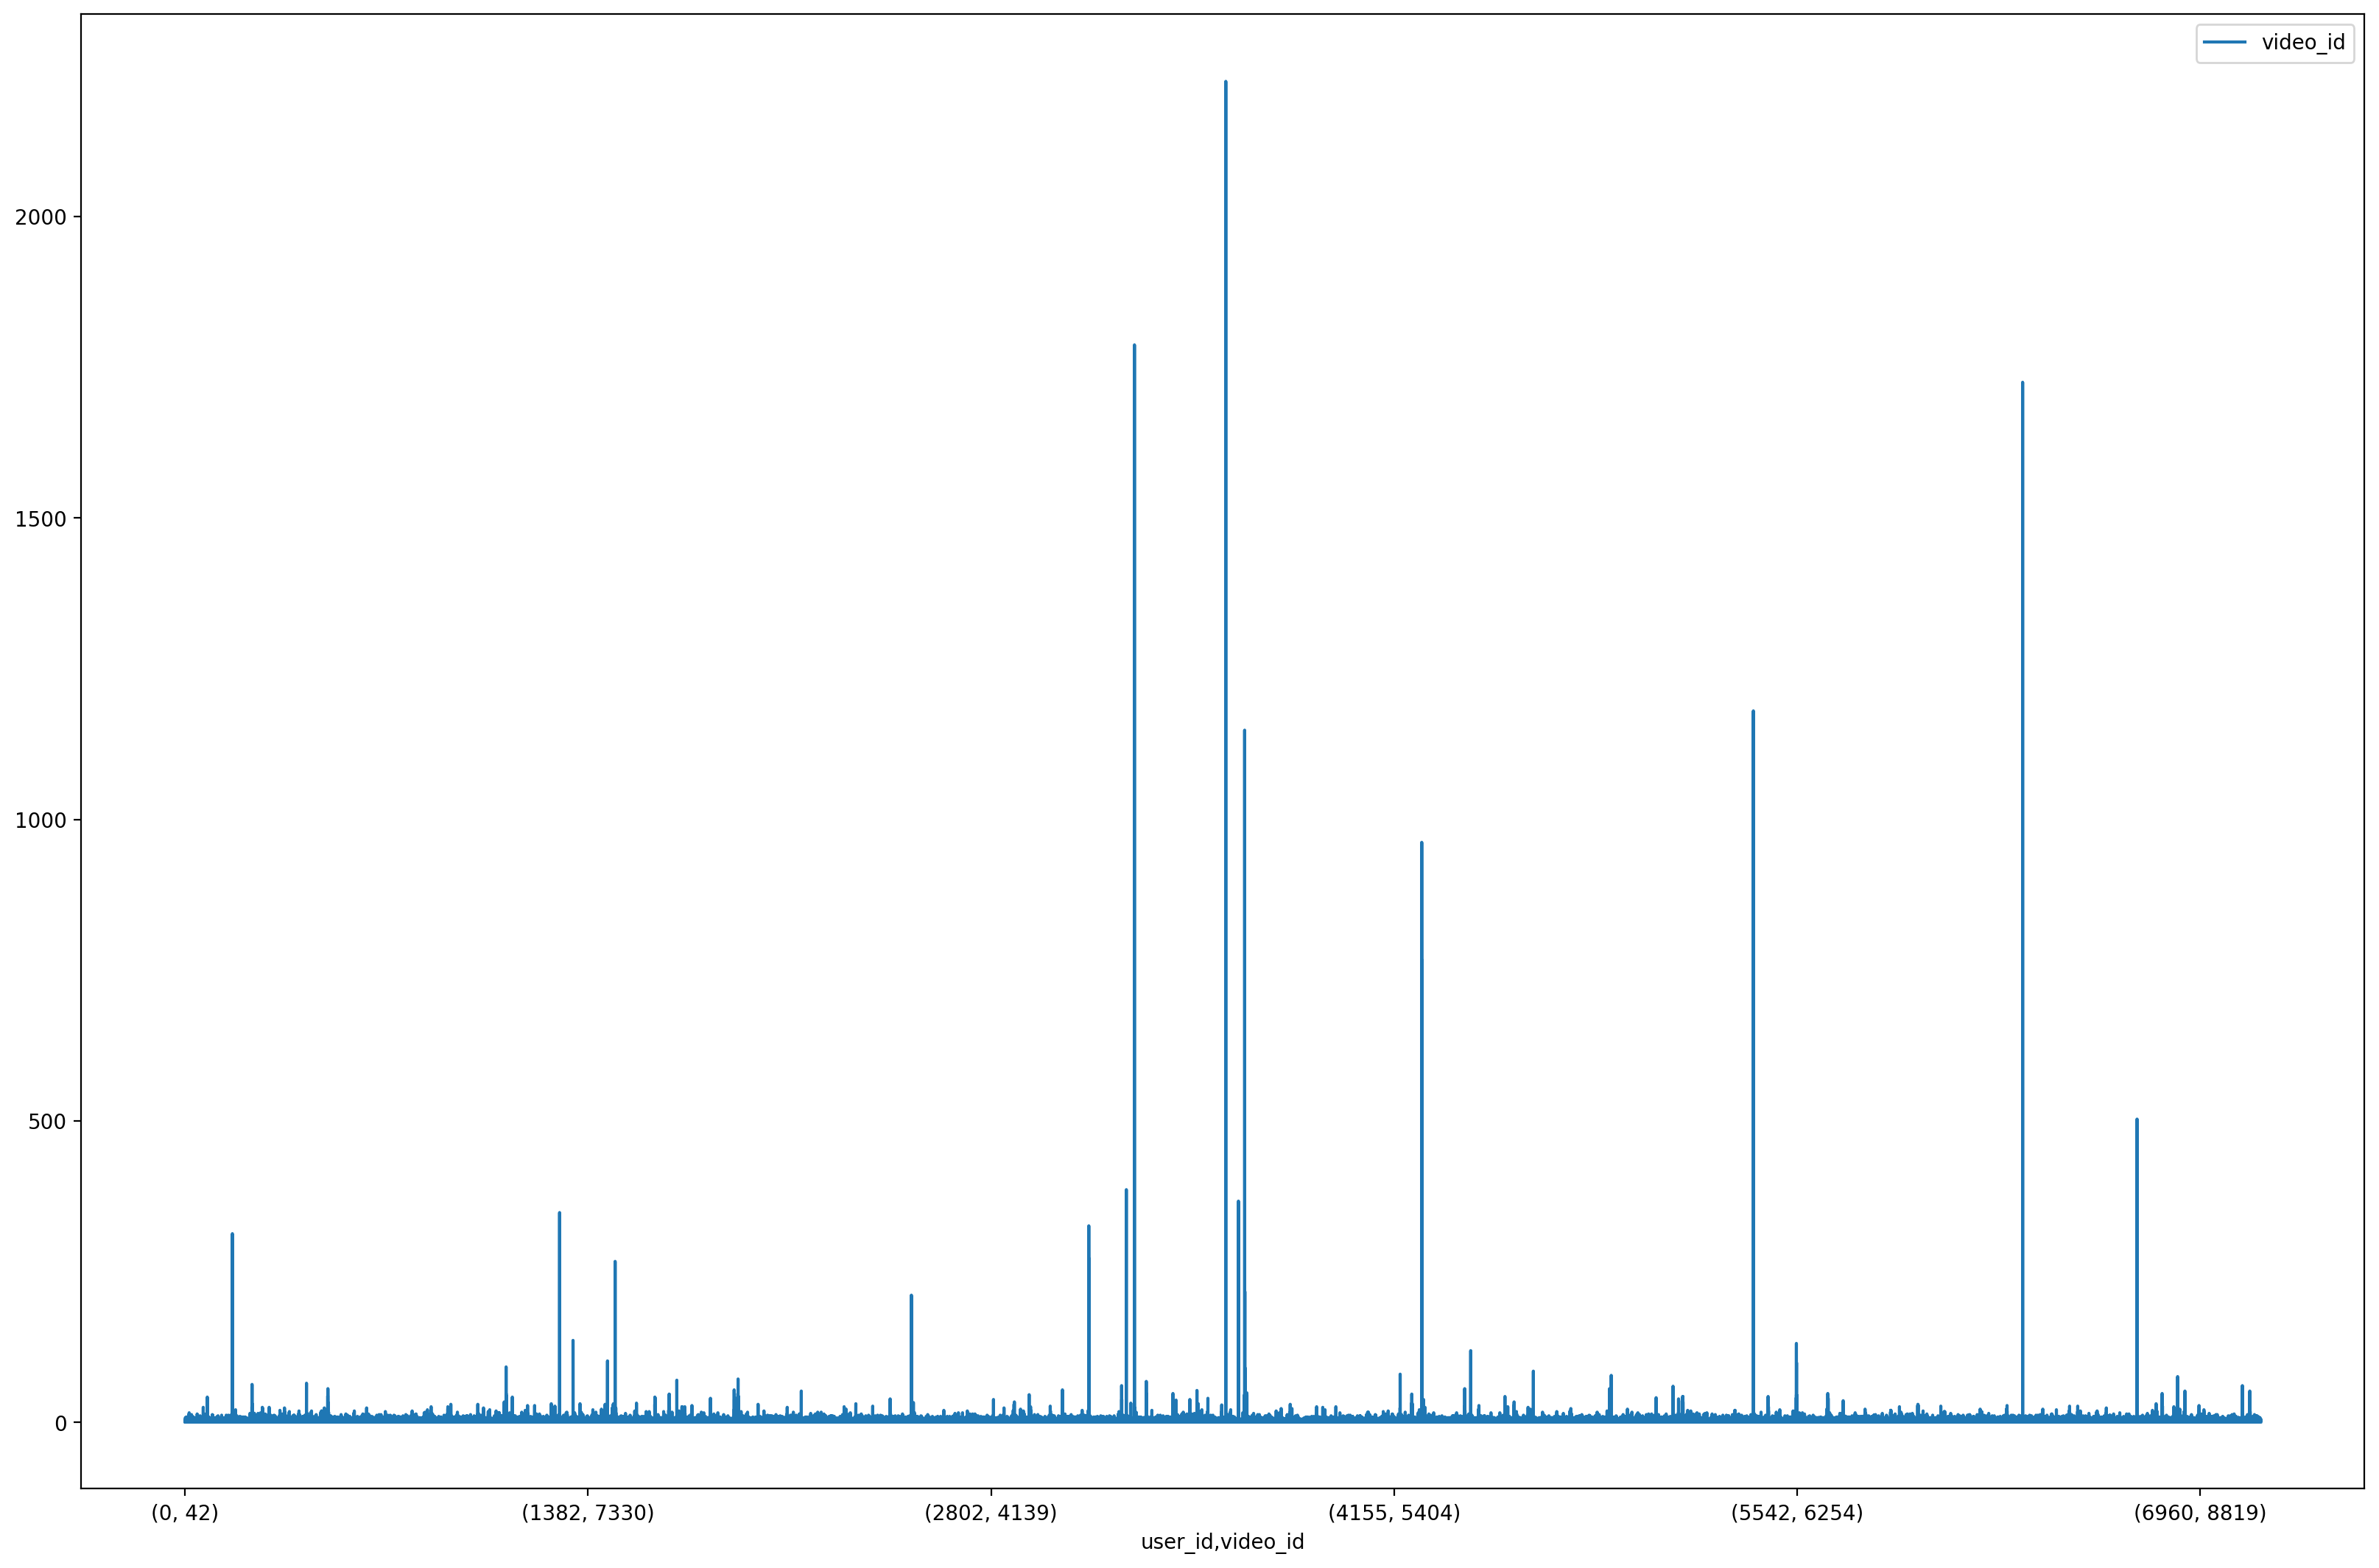

In [ ]:
test.plot()

In [14]:


interactions['rating'] = np.where(interactions['watch_ratio'] > 0.2,1,0)

In [15]:
interactions['rating']

0           1
1           1
2           0
3           0
4           0
           ..
12530801    1
12530802    1
12530803    1
12530804    1
12530805    1
Name: rating, Length: 12530806, dtype: int64

In [6]:
interactions.drop_duplicates(subset=['user_id','video_id'], keep='last', inplace=True)

In [17]:
rating_matrix = interactions.pivot(index="user_id",columns="video_id",values="rating")
rating_matrix

video_id,0,1,2,3,4,5,6,7,8,9,...,10718,10719,10720,10721,10722,10723,10724,10725,10726,10727
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
  """
  Returns the cost for the content-based filtering
  Vectorised for speed. Uses tensorflow operations to be compatible with custom training loop.

  Parameters
  ----------
  X: np.ndarray (num_movies,num_features)
    matrix of item features
  W: np.ndarray (num_users,num_features)
    matrix of user parameters
  b: np.ndarray (1, num_users)
    vector of user parameters
  Y: np.ndarray (num_movies,num_users)
    matrix of user ratings of movies
  R: np.ndarray (num_movies,num_users)
    matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
  lambda_: float
    regularization parameter

  Returns
  -------
  float
      The value of the cost given the parameters.
  """
  j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y) * R
  J = 0.5 * tf.reduce_sum(j**2) + (lambda_ / 2) * (
      tf.reduce_sum(X**2) + tf.reduce_sum(W**2)
  )
  return J

In [19]:
Y = rating_matrix.T
Y = Y.fillna(0)
Y


user_id,0,1,2,3,4,5,6,7,8,9,...,7166,7167,7168,7169,7170,7171,7172,7173,7174,7175
video_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
R = np.where(Y > 0, 1, 0)
R = R.astype(np.float32)

In [21]:
num_videos, num_users = Y.shape
num_features = 1000

tf.random.set_seed(1234)  # for consistent results
W = tf.Variable(tf.random.normal((num_users, num_features), dtype=tf.float64), name="W")
X = tf.Variable(
    tf.random.normal((num_videos, num_features), dtype=tf.float64), name="X"
)
b = tf.Variable(tf.random.normal((1, num_users), dtype=tf.float64), name="b")

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [22]:
iterations = 200
lambda_ = 1
for iter in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost
    with tf.GradientTape() as tape:
        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_func_v(X, W, b, Y, R, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient(cost_value, [X, W, b])

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients(zip(grads, [X, W, b]))

    # Log periodically.
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 4362598258.1
Training loss at iteration 20: 65181047.0
Training loss at iteration 40: 11778862.6
Training loss at iteration 60: 5137034.6
Training loss at iteration 80: 3776809.1
Training loss at iteration 100: 3216799.9
Training loss at iteration 120: 2839716.4
Training loss at iteration 140: 2539315.3
Training loss at iteration 160: 2287868.8
Training loss at iteration 180: 2072987.6


In [23]:
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()


In [25]:
my_predictions = p[:, 0]

In [44]:
my_predictions

array([1.09633504, 1.30056227, 0.92926071, ..., 1.69445747, 0.12007206,
       2.23028271])

In [34]:
R[0, 0] 

np.float32(0.0)

In [48]:
type(Y)

pandas.core.frame.DataFrame

In [ ]:
ix[1

<tf.Tensor: shape=(), dtype=int32, numpy=4144>

In [54]:
ix = tf.argsort(my_predictions, direction="DESCENDING")

for i in range(17):
    j = int(ix[i].numpy())

    if R[j,0] == 1.0:
        print(f"Predicting rating {my_predictions[j]:0.2f} for movie {Y[:,0][j]}")
    else:
        print(f"Predicting rating {my_predictions[j]:0.2f} for movie {Y.iloc[j,0]} (not rated)")



Predicting rating 27.72 for movie 0.0 (not rated)
Predicting rating 26.61 for movie 0.0 (not rated)
Predicting rating 24.64 for movie 0.0 (not rated)
Predicting rating 23.75 for movie 0.0 (not rated)
Predicting rating 22.72 for movie 0.0 (not rated)
Predicting rating 22.03 for movie 0.0 (not rated)
Predicting rating 21.96 for movie 0.0 (not rated)
Predicting rating 21.53 for movie 0.0 (not rated)
Predicting rating 21.15 for movie 0.0 (not rated)
Predicting rating 20.83 for movie 0.0 (not rated)
Predicting rating 20.73 for movie 0.0 (not rated)
Predicting rating 20.56 for movie 0.0 (not rated)
Predicting rating 20.51 for movie 0.0 (not rated)
Predicting rating 20.18 for movie 0.0 (not rated)
Predicting rating 19.72 for movie 0.0 (not rated)
Predicting rating 19.64 for movie 0.0 (not rated)
Predicting rating 19.57 for movie 0.0 (not rated)


# Neural network encoder

In [16]:
from sklearn.preprocessing import StandardScaler

In [7]:
interactions['rating'] = interactions['watch_ratio'].clip(upper=1.0)
interactions 

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,rating
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397,1.000000
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082,1.000000
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613,0.107613
6,0,6789,2327,13267,2020-07-05 03:28:02.32,20200705,1.593891e+09,0.175398,0.175398
7,0,6812,23731,10728,2020-07-05 22:22:11.813,20200705,1.593959e+09,2.212062,1.000000
...,...,...,...,...,...,...,...,...,...
12530800,7175,6630,4342,13855,2020-09-05 15:00:33.379,20200905,1.599289e+09,0.313389,0.313389
12530801,7175,1281,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241,0.247241
12530802,7175,3407,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526,0.576526
12530804,7175,10360,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400,0.913400


KeyboardInterrupt: 

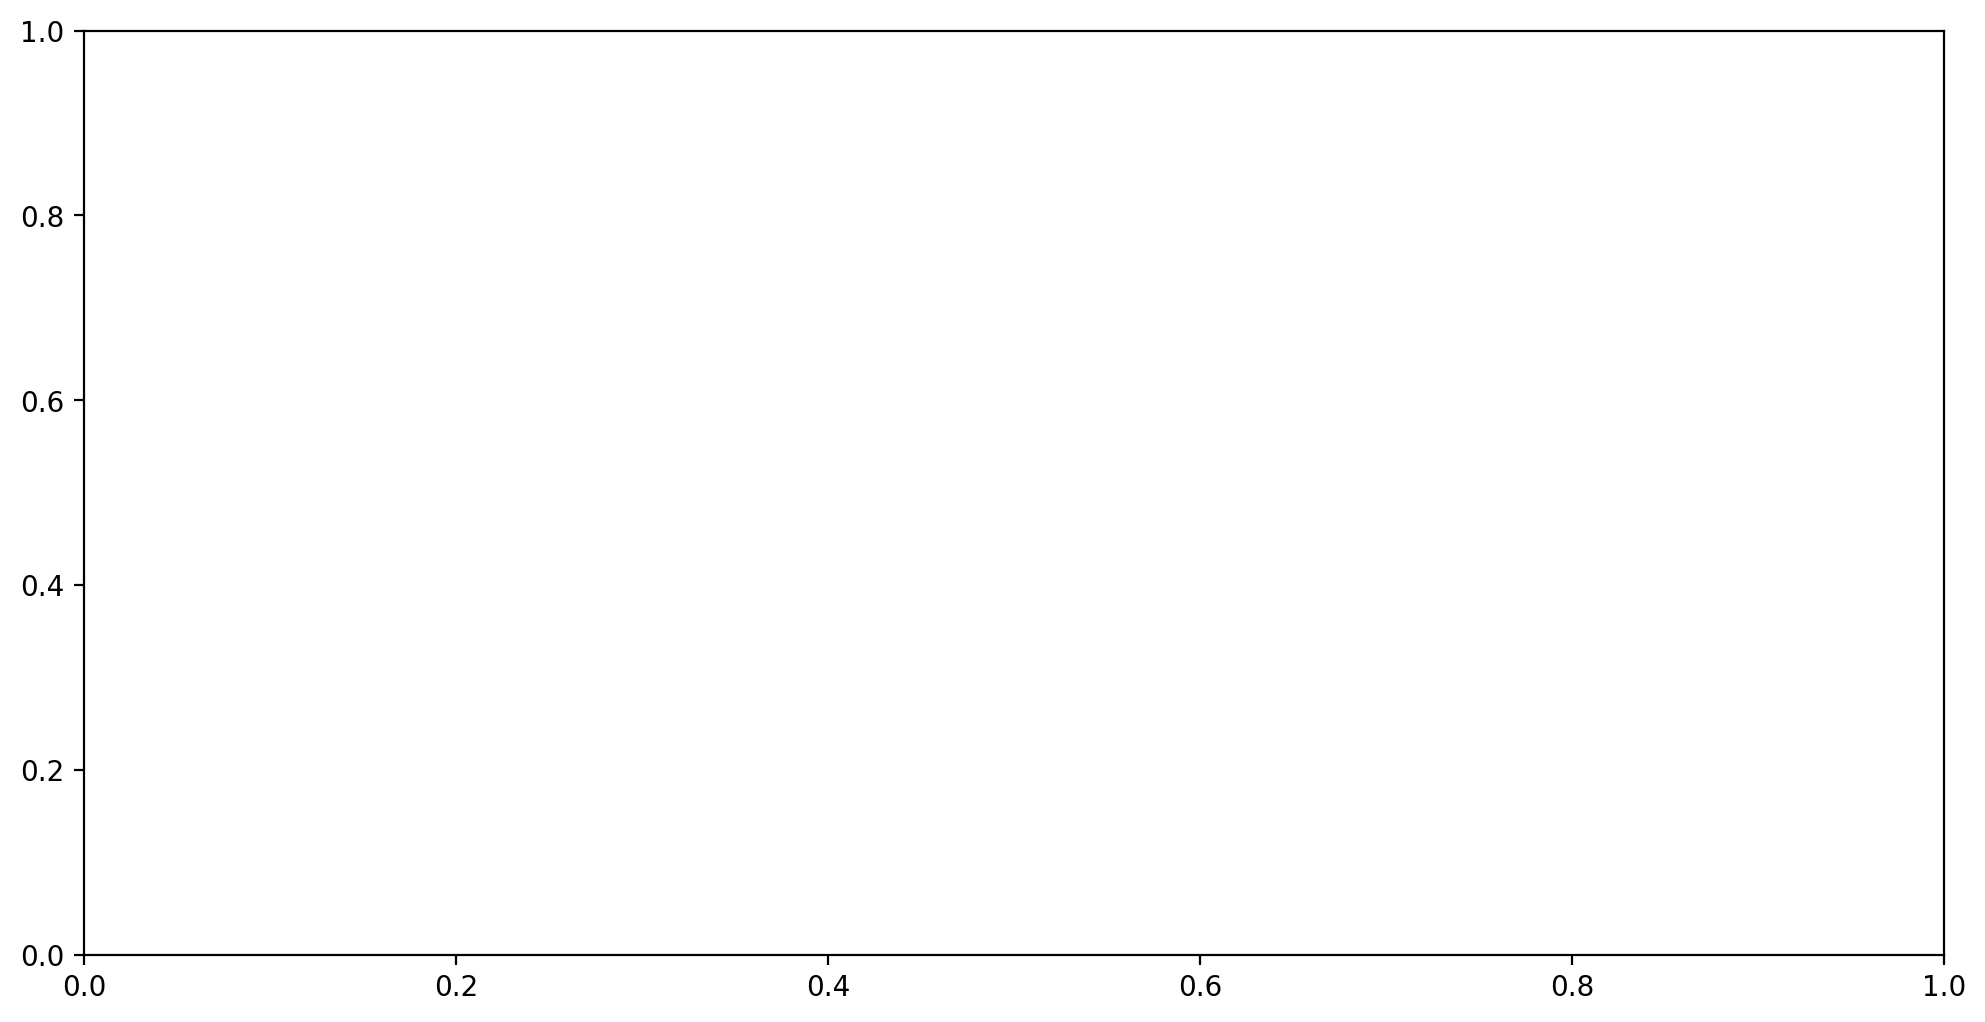

In [10]:
# Compter les occurrences de chaque valeur de rating
rating_counts = interactions['rating'].value_counts()

# Tracer un histogramme
plt.figure(figsize=(12, 6))
rating_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution des Ratings")
plt.xlabel("Valeur du Rating")
plt.ylabel("Nombre d'occurrences")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [11]:
user_features.columns

Index(['user_id', 'user_active_degree', 'is_lowactive_period',
       'is_live_streamer', 'is_video_author', 'follow_user_num',
       'follow_user_num_range', 'fans_user_num', 'fans_user_num_range',
       'friend_user_num', 'friend_user_num_range', 'register_days',
       'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat2',
       'onehot_feat3', 'onehot_feat4', 'onehot_feat5', 'onehot_feat6',
       'onehot_feat7', 'onehot_feat8', 'onehot_feat9', 'onehot_feat10',
       'onehot_feat11', 'onehot_feat12', 'onehot_feat13', 'onehot_feat14',
       'onehot_feat15', 'onehot_feat16', 'onehot_feat17'],
      dtype='object')

In [8]:
user_features_columns = ['user_id','onehot_feat0', 'onehot_feat1', 'onehot_feat2',
       'onehot_feat3', 'onehot_feat4', 'onehot_feat5', 'onehot_feat6',
       'onehot_feat7', 'onehot_feat8', 'onehot_feat9', 'onehot_feat10',
       'onehot_feat11', 'onehot_feat12', 'onehot_feat13', 'onehot_feat14',
       'onehot_feat15', 'onehot_feat16', 'onehot_feat17']

df_user_features = user_features[user_features_columns]


In [17]:
item_categories_one_hot.columns

Index(['video_id', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5',
       'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30'],
      dtype='object')

In [12]:
item_features_columns = ['video_id', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5',
       'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30']

df_item_features = item_categories_one_hot[item_features_columns]


In [22]:
interactions

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,rating
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397,1.000000
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082,1.000000
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000,0.078000
...,...,...,...,...,...,...,...,...,...
12530801,7175,1281,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241,0.247241
12530802,7175,3407,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526,0.576526
12530803,7175,10360,2407,7067,2020-09-05 19:10:29.041,20200905,1.599304e+09,0.340597,0.340597
12530804,7175,10360,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400,0.913400


In [13]:
df = interactions[['user_id', 'video_id', 'rating']].merge(df_user_features, on='user_id', how='left').merge(df_item_features, on='video_id', how='left')
df.head()

,user_id,video_id,rating,onehot_feat0,onehot_feat1,onehot_feat2,onehot_feat3,onehot_feat4,onehot_feat5,onehot_feat6,...,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30
0,0,3649,1.000000,0,1,17,638,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9598,1.000000,0,1,17,638,2.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,5262,0.107613,0,1,17,638,2.0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,6789,0.175398,0,1,17,638,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,6812,1.000000,0,1,17,638,2.0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
num_user_features = len(df_user_features.columns) - 1
num_item_features = len(df_item_features.columns) - 1

In [15]:
import tensorflow as tf

# Définir le nombre de caractéristiques utilisateur et item

num_outputs = 32  # Le nombre de sorties pour chaque vecteur utilisateur et item

# Réseaux de neurones pour l'utilisateur et l'item
user_NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(num_outputs)
    ]
)

item_NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(num_outputs)
    ]
)

# Entrée utilisateur
input_user = tf.keras.layers.Input(shape=(num_user_features,))
vu = user_NN(input_user)

# Normaliser les vecteurs utilisateur et item dans une couche Lambda
vu = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)

# Entrée item
input_item = tf.keras.layers.Input(shape=(num_item_features,))
vm = item_NN(input_item)

# Normaliser également les vecteurs item
vm = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

# Calculer le produit scalaire des deux vecteurs
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# Créer le modèle avec les entrées et la sortie
model = tf.keras.Model([input_user, input_item], output)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 31)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 32)        │     41,888 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 32)        │     45,216 │ input_layer_2[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 32)        │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 32)        │          0 │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ lambda[0][0],     │
│                     │                   │            │ lambda_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 87,104 (340.25 KB)

 Trainable params: 87,104 (340.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow import keras

In [18]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=cost_fn)

In [19]:
X_user = df[user_features_columns].drop(columns=['user_id']).to_numpy()
X_item = df[item_features_columns].drop(columns=['video_id']).to_numpy()

In [20]:
model.fit(
    [X_user, X_item],
    df['rating'].values,
    batch_size=128,
    epochs=10,
    verbose=1,
)   

Epoch 1/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 151s 2ms/step - loss: 0.1109
Epoch 2/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - loss: 0.1102
Epoch 3/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - loss: 0.1102
Epoch 4/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - loss: 0.1101
Epoch 5/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - loss: 0.1101
Epoch 6/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - loss: 0.1101
Epoch 7/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - loss: 0.1101
Epoch 8/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - loss: 0.1101
Epoch 9/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 152s 2ms/step - loss: 0.1101
Epoch 10/10
80477/80477 ━━━━━━━━━━━━━━━━━━━━ 166s 2ms/step - loss: 0.1101


In [23]:
model.save_weights("model.weights.h5")

In [24]:
interactions_test

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


In [25]:
interactions_test['rating'] = interactions_test['watch_ratio'].clip(upper=1.0)

In [34]:

from tqdm import tqdm

In [39]:
def precision_at_k(model, test_df, df_user_features, df_item_features, k=10):
    from collections import defaultdict


    # mapping: user_id -> list of true items
    user_item_true = defaultdict(set)
    for _, row in test_df.iterrows():
        user_item_true[row["user_id"]].add(row["video_id"])

    all_item_ids = df_item_features["video_id"].unique()
    precisions = []

    for user_id in tqdm(user_item_true):
        true_items = user_item_true[user_id]

        # Get feature vector for this user
        user_feat = df_user_features[df_user_features["user_id"] == user_id].drop("user_id", axis=1).values
        if user_feat.shape[0] == 0:
            continue  # skip unknown user

        user_vec = np.repeat(user_feat, len(all_item_ids), axis=0)

        # Get feature vectors for all items
        item_feat_rows = df_item_features[df_item_features["video_id"].isin(all_item_ids)]
        item_vecs = item_feat_rows.drop("video_id", axis=1).values

        preds = model.predict([user_vec, item_vecs], batch_size=1024, verbose=0).flatten()

        # top-k item_ids
        top_k_item_ids = item_feat_rows.iloc[np.argsort(preds)[::-1][:k]]["video_id"].values

        hits = sum([1 for item in top_k_item_ids if item in true_items])
        precisions.append(hits / k)

    return np.mean(precisions)


In [40]:
precision = precision_at_k(model, interactions_test, df_user_features, df_item_features, k=10)

100%|██████████| 1411/1411 [02:18<00:00, 10.17it/s]


In [44]:
prec, recall, ndcg = precision_recall_ndcg_at_k(model, interactions_test, df_user_features, df_item_features, k=10)
print(f"Precision@10 = {prec:.4f}, Recall@10 = {recall:.4f}, NDCG@10 = {ndcg:.4f}")

Ranking metrics @K=10:   0%|          | 0/1411 [00:01<?, ?it/s]


InvalidArgumentError: Graph execution error:

Detected at node functional_2_1/sequential_2/dense_1/Relu defined at (most recent call last):
  File "C:\Users\letru\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\letru\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\letru\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever

  File "C:\Users\letru\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once

  File "C:\Users\letru\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3077, in run_cell

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3132, in _run_cell

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3336, in run_cell_async

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3519, in run_ast_nodes

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code

  File "C:\Users\letru\AppData\Local\Temp\ipykernel_7728\4229406905.py", line 1, in <module>

  File "C:\Users\letru\AppData\Local\Temp\ipykernel_7728\3564215291.py", line 55, in precision_recall_ndcg_at_k

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 560, in predict

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 259, in one_step_on_data_distributed

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 249, in one_step_on_data

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in predict_step

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\models\functional.py", line 183, in call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\models\functional.py", line 643, in call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\models\sequential.py", line 221, in call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\models\functional.py", line 183, in call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\models\functional.py", line 643, in call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\layers\core\dense.py", line 148, in call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\activations\activations.py", line 101, in static_call

  File "d:\programmation\FinalProject_2025_Alexis.LE-TRUNG\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [1024,19], In[1]: [18,256]
	 [[{{node functional_2_1/sequential_2/dense_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_2804258]

In [51]:
def precision_recall_ndcg_mae_at_k(model, test_df, df_user_features, df_item_features, k=10):
    # Préparation : dictionnaire {user_id: set(video_id)}
    user_item_true = (
        test_df.groupby("user_id")["video_id"]
        .apply(set)
        .to_dict()
    )

    precisions, recalls, ndcgs = [], [], []
    y_true, y_pred = [], []

    for user_id in tqdm(user_item_true):
        true_items = user_item_true[user_id]

        # Obtenir les features de l'utilisateur
        user_feat_df = df_user_features[df_user_features["user_id"] == user_id]
        if user_feat_df.empty:
            continue  # utilisateur inconnu
        user_feat = user_feat_df.drop("user_id", axis=1).values

        # Prédire pour tous les items
        item_feat_rows = df_item_features.copy()
        item_vecs = item_feat_rows.drop("video_id", axis=1).values
        preds = model.predict([np.repeat(user_feat, len(item_vecs), axis=0), item_vecs], batch_size=1024, verbose=0).flatten()

        # Récupérer les k premiers items
        top_k_indices = np.argsort(preds)[::-1][:k]
        top_k_item_ids = item_feat_rows.iloc[top_k_indices]["video_id"].values
        top_k_preds = preds[top_k_indices]

        # MAE : récupérer la vraie note et la prédiction pour chaque item réellement noté
        for item_id, pred in zip(top_k_item_ids, top_k_preds):
            if item_id in true_items:
                rating_row = test_df[
                    (test_df["user_id"] == user_id) & (test_df["video_id"] == item_id)
                ]
                if not rating_row.empty:
                    y_true.append(rating_row["rating"].values[0])
                    y_pred.append(pred)

        # Calculer précision, rappel et NDCG
        hits = sum(1 for item in top_k_item_ids if item in true_items)
        precisions.append(hits / k)
        recalls.append(hits / len(true_items))

        dcg = sum(
            1 / np.log2(idx + 2)
            for idx, item in enumerate(top_k_item_ids)
            if item in true_items
        )
        idcg = sum(1 / np.log2(idx + 2) for idx in range(min(len(true_items), k)))
        ndcgs.append(dcg / idcg if idcg > 0 else 0)

    mae = mean_absolute_error(y_true, y_pred)
    return np.mean(precisions), np.mean(recalls), np.mean(ndcgs), mae


In [50]:
from sklearn.metrics import mean_absolute_error

In [52]:
prec, recall, ndcg, mae = precision_recall_ndcg_mae_at_k(model, interactions_test, df_user_features, df_item_features, k=10)
print(f"Precision@10 = {prec:.4f}, Recall@10 = {recall:.4f}, NDCG@10 = {ndcg:.4f}, MAE = {mae:.4f}")

100%|██████████| 1411/1411 [02:57<00:00,  7.95it/s]


Precision@10 = 0.2000, Recall@10 = 0.0006, NDCG@10 = 0.2489, MAE = 0.1648
